In [0]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns

In [0]:
q = pd.read_csv('/content/Dataset_KPCA.csv')
q.head()
p=q.to_numpy()

In [0]:
# split into input (X) and output (Y) variables
X = p[:,0:5]
Y = p[:,5]

In [0]:
acc=np.zeros(20)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 100)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc[i-1]=metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",acc[i-1],"for k=",i)
max=np.argmax(acc)
print()
print("Max accuracy=",acc[max],"at k=",max+1) 

Accuracy: 0.9107762810720733 for k= 1
Accuracy: 0.9306346340786001 for k= 2
Accuracy: 0.9253575892237189 for k= 3
Accuracy: 0.9349395917233717 for k= 4
Accuracy: 0.9300097208721011 for k= 5
Accuracy: 0.934522982919039 for k= 6
Accuracy: 0.9327176781002638 for k= 7
Accuracy: 0.9345924177197611 for k= 8
Accuracy: 0.9326482432995418 for k= 9
Accuracy: 0.935078461324816 for k= 10
Accuracy: 0.9346618525204833 for k= 11
Accuracy: 0.9366754617414248 for k= 12
Accuracy: 0.9354256353284266 for k= 13
Accuracy: 0.9363282877378142 for k= 14
Accuracy: 0.9348701569226496 for k= 15
Accuracy: 0.9355645049298709 for k= 16
Accuracy: 0.9344535481183169 for k= 17
Accuracy: 0.9363282877378142 for k= 18
Accuracy: 0.9354950701291487 for k= 19
Accuracy: 0.9361199833356478 for k= 20

Max accuracy= 0.9366754617414248 at k= 12


In [0]:
knn = KNeighborsClassifier(n_neighbors = max+1)
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.93648039 0.58590767 0.70808747 0.46233947 0.33784722 0.34479167
 0.51875    0.87465278 0.828125   0.528125  ]
0.6125106661460141


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:' ,accuracy*100)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f', precision*100)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f', recall*100)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f',f1)
 # kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f', kappa)
# ROC AUC
auc_1 = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f', auc_1)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix' , matrix)

Accuracy: 93.61199833356478
Precision: %f 95.10214772132007
Recall: %f 83.20348304307974
F1 score: %f 0.8875580542654606
Cohens kappa: %f 0.8432225039123853
ROC AUC: %f 0.9067028107125097
Confusion Matrix [[9851  187]
 [ 733 3631]]


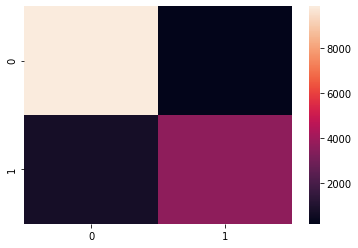

In [0]:
#Plot of the Confusion Matrix
ax = sns.heatmap(matrix)

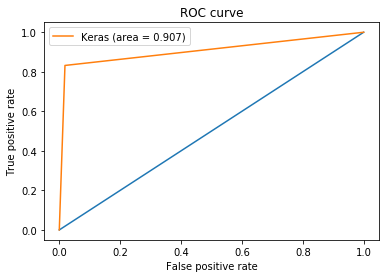

In [0]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()